# Feature Selection

In [1]:
# Libraries

## Basic libraries
import numpy as np
import pandas as pd
import seaborn as sns

import math
from numpy import mean 
from numpy import std
from numpy import percentile 
# from scipy.stats import iqr

## Plotting
import matplotlib.pyplot as plt

from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from matplotlib import pyplot

## What is feature selection ?

### 🌟 Core Concept: Feature Selection

🌟 **Core Concept: Feature Selection**
- Reduces number of input variables in a model.
- Aims to improve **computational efficiency** and **model performance**.
- Helps remove **irrelevant** or **redundant** data.

### 🧠 Types of Feature Selection

#### 🔹 Unsupervised

🔹 **Unsupervised**
- **Ignores** the target variable.
- Used for **data cleaning** (e.g., low variance, high correlation).

#### 🔹 Supervised

🔹 **Supervised**
- **Considers** the target variable.
- Subtypes:<br>
o	**Filter**: Uses statistics to score each input’s relationship with the target.<br>
o	**Wrapper**: Searches feature subsets based on model performance.<br>
o	**Intrinsic**: Feature selection built into the learning algorithm (e.g., Lasso, Decision Trees).

### 📊 Statistical Measures for **Filter Methods**

Selection depends on the data types of input/output variables:<br>
**✅ Numerical Input ➡️ Numerical Output (Regression)**
- Pearson’s Correlation (linear)
- Spearman’s Rank (non-linear)
- Mutual Information<br>
**✅ Numerical Input ➡️ Categorical Output (Classification)**<br>
- ANOVA F-test
- Kendall’s Tau (ordinal target)
- Mutual Information<br>
**✅ Categorical Input ➡️ Numerical Output (Regression)**<br>
- Reverse application of the above methods<br>
**✅ Categorical Input ➡️ Categorical Output (Classification)**<br>
- Chi-Squared Test
- Mutual Information

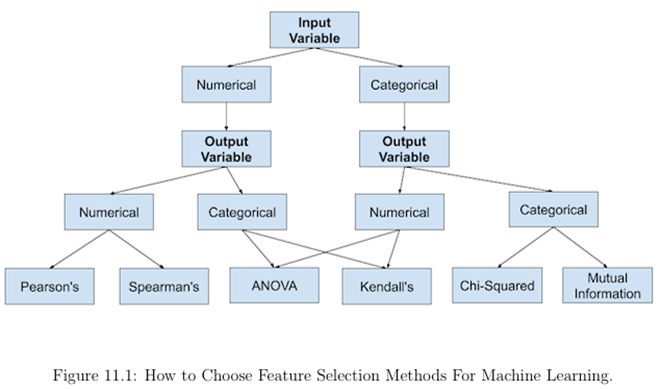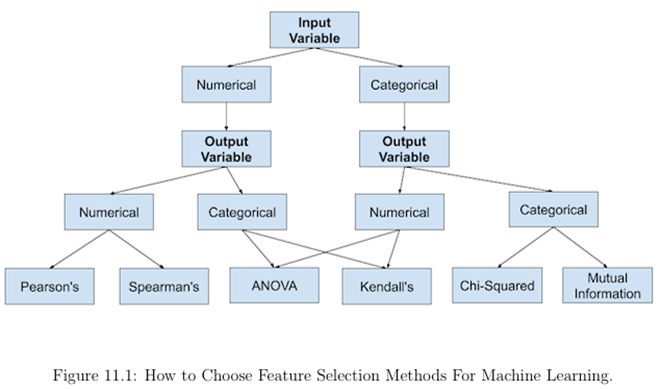

### 🔄 Handling Mixed Data Types (**Wrapper methods**)

🔄 Handling Mixed Data Types
- Use **ColumnTransformer** to apply suitable stats per variable type.
- **Wrapper methods** like:<br>
o	**Tree search** (e.g., best-first)<br>
o	**Stochastic search** (e.g., genetic algorithms)<br>
o	**Step-wise regression**, **RFE (Recursive Feature Elimination)**

### 🤖 Model-Based (**Intrinsic**) Feature Scoring

🤖 **Model-Based (Intrinsic) Feature Scoring** <br>
Use model’s built-in feature importance scores:
- **Decision Trees (CART)**
- **Random Forest**
- **Gradient Boosting**
- **Bagging Trees**


### ❓ Common Questions

- **How to filter?**<br>
o	SelectKBest, SelectPercentile from sklearn.
- **Adapting statistics to data types?**<br>
o	Try data transformations (e.g., binning numeric, ordering categoricals).
- **How to inspect selected features?**<br>
o	Apply selection method directly, inspect column indices/names.
- **Best method?**<br>
o	No universal best. Experiment and validate on your dataset.

### 🔍 Key Takeaways

🔍 **Key Takeaways**
- Supervised feature selection includes filter, wrapper, and intrinsic methods.
- Always choose statistical measures based on **input/output data types.**
- Validate methods **empirically** for each use case.

## How to Select Categorical Input Features (for Classification)

🧪 **Two Key Feature Selection Techniques**<br><br>
-	**Chi-Squared (χ²) Test**<br>
o	Measures independence between feature and target.<br>
o	**High score** → **strong relationship.**<br>
o	Used with **SelectKBest** in scikit-learn.<br><br>
-	**Mutual Information**<br>
o	Measures reduction in uncertainty of target given a feature.<br>
o	Captures non-linear relationships.<br>
o	Also used with **SelectKBest**.

### Chi-Squared (χ²) Test

**Chi-Squared (χ²) Test**<br>
- Measures independence between feature and target.<br>
- **High score** → **strong relationship.**<br>
- Used with **SelectKBest** in scikit-learn.<br><br>

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


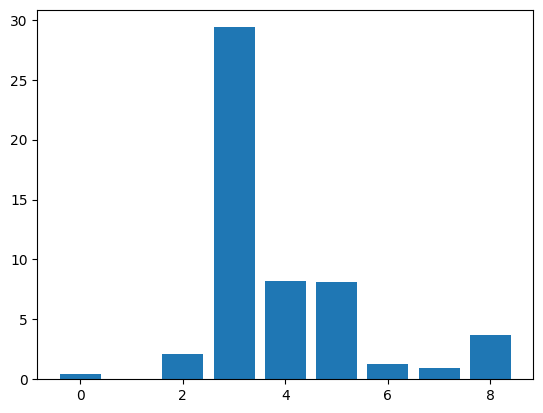

In [49]:
# example of chi squared feature selection for categorical data 
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
    # load the dataset
    data = pd.read_csv(filename, header=None)  
    # split into input and output variables
    X = data.iloc[:,0:9]
    y = data.iloc[:,9]   
    # format all fields as string
    X = X.astype(str) 
    return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder() 
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train) 
    X_test_enc = oe.transform(X_test) 
    
    # Convert to Pandas DataFrames
    X_train_enc = pd.DataFrame(X_train_enc,columns=oe.get_feature_names_out())
    X_test_enc = pd.DataFrame(X_test_enc,columns=oe.get_feature_names_out())
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder() 
    le.fit(y_train)
    y_train_enc = le.transform(y_train) 
    y_test_enc = le.transform(y_test) 
    
    # Convert to Pandas DataFrames
    y_train_enc = pd.DataFrame(y_train_enc, columns=[str('y_train_enc')])
    y_test_enc = pd.DataFrame(y_test_enc,columns=[str('y_test_enc')])

    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test): 
    fs = SelectKBest(score_func=chi2, k='all') 
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)

    # Convert to Pandas DataFrames
    X_train_fs = pd.DataFrame(X_train_fs, columns=fs.get_feature_names_out())
    X_test_fs = pd.DataFrame(X_test_fs, columns=fs.get_feature_names_out())
    
    return X_train_fs, X_test_fs, fs

# load the dataset
path_breast_cancer_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
X, y = load_dataset(path_breast_cancer_data) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test) 

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test) 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc) 

# what are scores for the features
for i in range(len(fs.scores_)): 
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_) 
pyplot.show()